In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

from scipy.interpolate import interp1d
from scipy.optimize import curve_fit #Use non-linear least squares to fit a function, f, to data.
from scipy.integrate import solve_ivp, quad
from scipy.linalg import eig # Solve an ordinary or generalized eigenvalue problem of a square matrix.

In [5]:
from scipy.optimize import fsolve

## Ecuacion diferencial con $n$ arbitrario. 

$$f''+\frac{f'}{r}-n^2\frac{f}{r^2}-\lambda[f^2-V^2]f=0. \quad(1)$$

- Para $n=0$, cerca del origen ($r=0$) tenemos que:

$$f''+\frac{f'}{r}=0, \to f(r)=c_1\log{(r)}+c_2, \to f(r)=\sigma(r),\quad (2)$$. 

entonces $f(r=0) =\sigma(r=0)=f_0$ y  $f'(r=0)=\sigma'(r=0)= 0$. 

- Para $n=1$, cerca del origen ($r=0$) tenemos que:

$$f''+\frac{f'}{r}-\frac{f}{r^2}=0, \to f(r)=\frac{c_1}{r}+c_2r, \to f(r)=r\sigma_0, \quad(3)$$. 

entonces $f(r=0) =r\sigma(r=0)=0$ con $\sigma_0= Arbitraria$ y  $f'(r=0) =\sigma(r=0)= arbitraria$ y $\sigma'(r=0)=0$

- Para $n=2$, cerca del origen ($r=0$) tenemos que:

$$f''+\frac{f'}{r}-4\frac{f}{r^2}=0, \to f(r)=\frac{c_1}{r^2}+c_2r^2, \to f(r)=r^2\sigma_0, \quad(4)$$. ## Ecuacion diferencial con $n$ arbitrario. 

$$f''+\frac{f'}{r}-n^2\frac{f}{r^2}-\lambda[f^2-V^2]f=0. \quad(1)$$

- Para $n=0$, cerca del origen ($r=0$) tenemos que:

$$f''+\frac{f'}{r}=0, \to f(r)=c_1\log{(r)}+c_2, \to f(r)=\sigma(r),\quad (2)$$. 

entonces $f(r=0) =\sigma(r=0)=f_0$ y  $f'(r=0)=\sigma'(r=0)= 0$. 

- Para $n=1$, cerca del origen ($r=0$) tenemos que:

$$f''+\frac{f'}{r}-\frac{f}{r^2}=0, \to f(r)=\frac{c_1}{r}+c_2r, \to f(r)=r\sigma_0, \quad(3)$$. 

entonces $f(r=0) =r\sigma(r=0)=0$ con $\sigma_0= Arbitraria$ y  $f'(r=0) =\sigma(r=0)= arbitraria$ y $\sigma'(r=0)=0$

- Para $n=2$, cerca del origen ($r=0$) tenemos que:

$$f''+\frac{f'}{r}-4\frac{f}{r^2}=0, \to f(r)=\frac{c_1}{r^2}+c_2r^2, \to f(r)=r^2\sigma_0, \quad(4)$$. 

## Ejemplo n = 1 

In [6]:
""" Systema de ecuaciones reducidas"""

def sistema2(r, Vector, arg):
    
    """
    Para n = 1 reducimos la ecuacion (3).
    
    Para r>0: 
    f' = y 
    y' = -y'/r + f/r^2 + \Lambda(f^2-V^2)f 
    
    Para r=0: 
    f'= y
    y' = 0 
    
    Notación: 
    y = df0
    f = f0
    """
    f, df0 = Vector 
    Lambda, V = arg
    
    if r > 0:
        f0 = df0
        f1 = -(df0/r)+(f/r**2)+Lambda*(f**2-V**2)*f
    else:
        f0 = df0
        f1 = 0
        #f2 = 0
        
    return [f0, f1]

In [7]:
def shooting2(df0max, df0min, Lambda, V, rmax_, rmin_, f0 = 0, met='RK45', Rtol=1e-09, Atol=1e-10):
    """

    """
    arg = [Lambda, V]
            
    while True:
        df0 = (df0max+df0min)/2
        U0 = [f0, df0]
        sol_ = solve_ivp(sistema2, [rmin_, rmax_], U0,
                         args=(arg,), method=met,  rtol=Rtol, atol=Atol)
        
        if abs(sol_.y[0][-1])-V < 0 :
            df0max = df0
    
        elif abs(sol_.y[0][-1])-V > 0:
            df0min = df0
            
        elif sol_.y[0][-1]-V == 1e-14:
            return df0
        
        if abs((df0max-df0min)/2) < 1e-14:
            print('Maxima precisión', df0)
            return df0

Maxima precisión 0.5831896324241193
0.5831896324241193
Maxima precisión 2.3327579757901695
2.3327579757901695
Maxima precisión 3.6449343371190857
3.6449343371190857


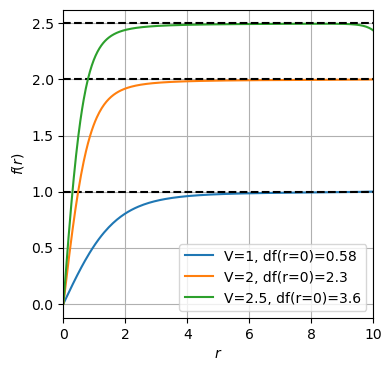

In [8]:
# n = 1
df0max =0
df0min =5
#dsigmax = 3
#semilla = [0.001]
Lambda = 1
V = [1,2,2.5]
rmax_ = 10
rmin_ = 0
arg = [Lambda, V]
f0 = 0
#rho0 = 0
met='RK45'
Rtol=1e-09
Atol=1e-10

plt.figure(figsize = (4,4))
for i in V: 
    #shooting2(df0max, df0min, Lambda, V, rmax_, rmin_)
    #df0 = shooting2(i, Lambda, V, rmax_, rmin_)
    df0 = shooting2(df0max,df0min, Lambda, i, rmax_, rmin_)
    U0 = [f0, df0]
    arg = [Lambda, i]
    print(df0)
    sol_ = solve_ivp(sistema2, [rmin_, rmax_], U0, args=(arg,), method=met,  rtol=Rtol, atol=Atol)
    #plt.plot(sol_.t, sol_.y[0], label = r'{}'.format(i))
    plt.plot(sol_.t, sol_.y[0], label = r'V={x}, df(r=0)={y:.2g}'.format(x=i, y=df0))
    plt.axhline(y= i, color='black', linestyle='--')  
    
plt.xlim(rmin_, rmax_)
plt.ylabel(r'$f(r)$')
plt.xlabel(r'$r$')
plt.grid()
plt.legend()
plt.savefig('f(r)n0.png')
plt.show()

 ## Ejemplo n = 1.  Con $\rho$

In [9]:
""" Systema de ecuaciones reducidas para n arbitrario"""

def sistema3(r, Vector, arg):    
    """
    Para n  reducimos la ecuacion (3). 
    
    Para r>0: 
    f' = y 
    y' = -y'/r + n^2f/r^2 + \Lambda(f^2-V^2)f 
    
    Para r=0:  
    f'= y
    y' = 0 
    
    Notación:  y = df0, f = f0
    
    cerca del origen: f = c_2r^n, f(r=0) = 0. 
    """
    f, df0 = Vector 
    Lambda, V , n = arg
    
    if r > 0:
        f0 = df0
        f1 = -(df0/r)+(n**2*f)/r**2+Lambda*(f**2-V**2)*f

    else:
        f0 = df0
        f1 = 0
        
    return [f0, f1]

In [10]:
def shooting3(df0max, df0min, Lambda, V, n, rmax_, rmin_, f0 = 0, met='RK45', Rtol=1e-09, Atol=1e-10):
    """

    """
    arg = [Lambda, V, n]
            
    while True:
        df0 = (df0max+df0min)/2
        U0 = [f0, df0]
        sol_ = solve_ivp(sistema3, [rmin_, rmax_], U0,
                         args=(arg,), method=met,  rtol=Rtol, atol=Atol)
        
        if abs(sol_.y[0][-1])-V < 0 :
            df0max = df0
            #print('sube', abs(sol_.y[0][-1]),df0min)
            
        elif abs(sol_.y[0][-1])-V > 0:
            df0min = df0
            #print('baja', abs(sol_.y[0][-1]),df0max)
            
        elif abs(sol_.y[0][-1])-V < 1e-14:
            #print('Hola3')
            return df0
        
        if abs((df0max-df0min)/2) < 1e-14:
            print('Maxima precisión', df0)
            return df0

Maxima precisión 0.5831896324241193
0.5831896324241193


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_2255/2072216673.py:29: RuntimeWarning: invalid value encountered in true_divide
  rho = df**2+f**2/r**2+Lambda*(f**2-i**2)**2


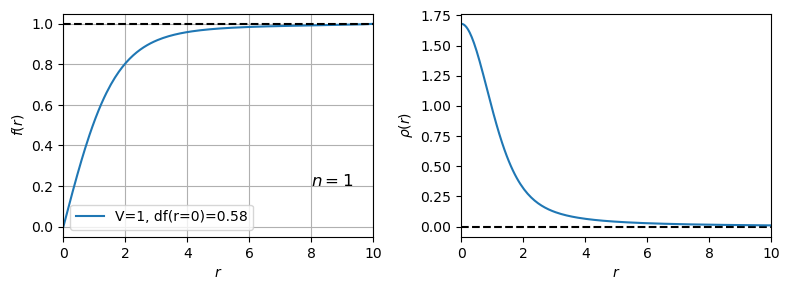

In [11]:
# n = 1
n = 1
df0max =0
df0min =5
Lambda = 1
V = [1]
rmax_ = 10
rmin_ = 0
f0 = 0
met='RK45'
Rtol=1e-09
Atol=1e-10

fig, ax = plt.subplots(1, 2, figsize = (8,3))

for i in V: 
    df0 = shooting3(df0max,df0min, Lambda, i, n,  rmax_, rmin_)
    U0 = [f0, df0]
    arg = [Lambda, i, n]
    print(df0)
    sol_ = solve_ivp(sistema3, [rmin_, rmax_], U0, args=(arg,), method=met,  rtol=Rtol, atol=Atol)
    #plt.plot(sol_.t, sol_.y[0], label = r'{}'.format(i))
    ax[0].plot(sol_.t, sol_.y[0], label = r'V={x}, df(r=0)={y:.2g}'.format(x=i, y=df0))
    ax[0].axhline(y= i, color='black', linestyle='--') 
    ax[1].axhline(y= 0, color='black', linestyle='--') 
    df = sol_.y[1]
    f = sol_.y[0]
    r = sol_.t
    rho = df**2+f**2/r**2+Lambda*(f**2-i**2)**2
    ax[1].plot(r, rho, label = r'V={x}, df(r=0)={y:.2g}'.format(x=i, y=df0))
    
ax[0].set_xlim(rmin_, rmax_)
ax[0].set_ylabel(r'$f(r)$')
ax[0].set_xlabel(r'$r$')
ax[1].set_xlim(rmin_, rmax_)
ax[1].set_ylabel(r'$\rho(r)$')
ax[1].set_xlabel(r'$r$')
ax[0].text(8, 0.2, r'$n=1$', fontsize=12, color='black')
ax[0].grid()
ax[0].legend()
fig.tight_layout()
plt.savefig('f(r)rho(r)n1.png')
plt.show()